In [1]:
import torch
from transformers import AutoModelForCausalLM
from transformers import AutoTokenizer, EsmForMaskedLM
from tokenizers import Tokenizer
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle



/opt/anaconda3/envs/MachLearn/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from plm_compare_esm import *

Using cpu device


In [3]:
model_name = "facebook/esm2_t33_650M_UR50D"
model, tokenizer = initialize_esm2(model_name)

In [4]:
df_prot = pd.read_csv('/Users/johnhutchens/Desktop/Practicum/Data/pbd_data_seq_long.csv')

In [5]:
df_prot.head()

,Unnamed: 0,structureId,chainId,sequence,residueCount,macromoleculeType
0,4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
1,7,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein
2,8,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
3,11,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,Protein
4,12,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [6]:
seq_list = list(df_prot['sequence'])

In [7]:
print(type(seq_list))

<class 'list'>


In [8]:
esm_pbd_long_matrix_dict = seq_matrix_dict(seq_list[:100], model, tokenizer)

In [9]:
esm_pbd_long_matrix_dict[9]["llr_matrix"]

tensor([[ -7.4095, -10.1232,  -8.3402,  ...,  -8.1152, -10.4366, -10.2466],
        [ -1.6216,  -6.0019,  -4.7650,  ...,   0.0000,  -9.2947,  -8.0453],
        [ -7.9397,  -8.1493,  -8.1178,  ...,  -6.5806,  -8.8973,  -7.8517],
        ...,
        [-10.4955,  -9.4570, -13.3259,  ...,  -9.2582,  -7.9392,   0.0000],
        [ -4.0329,  -8.9179,  -6.7964,  ...,  -4.2617, -11.0679,  -8.6341],
        [ -4.9738,  -9.2081,  -6.9487,  ...,  -6.8812, -10.3560,  -9.2693]])

In [10]:
filename = '/Users/johnhutchens/Desktop/Practicum/Data/ems_pbd_long_matrices.pickle' 

with open(filename, 'wb') as f:
    pickle.dump(esm_pbd_long_matrix_dict, f, protocol=pickle.HIGHEST_PROTOCOL)


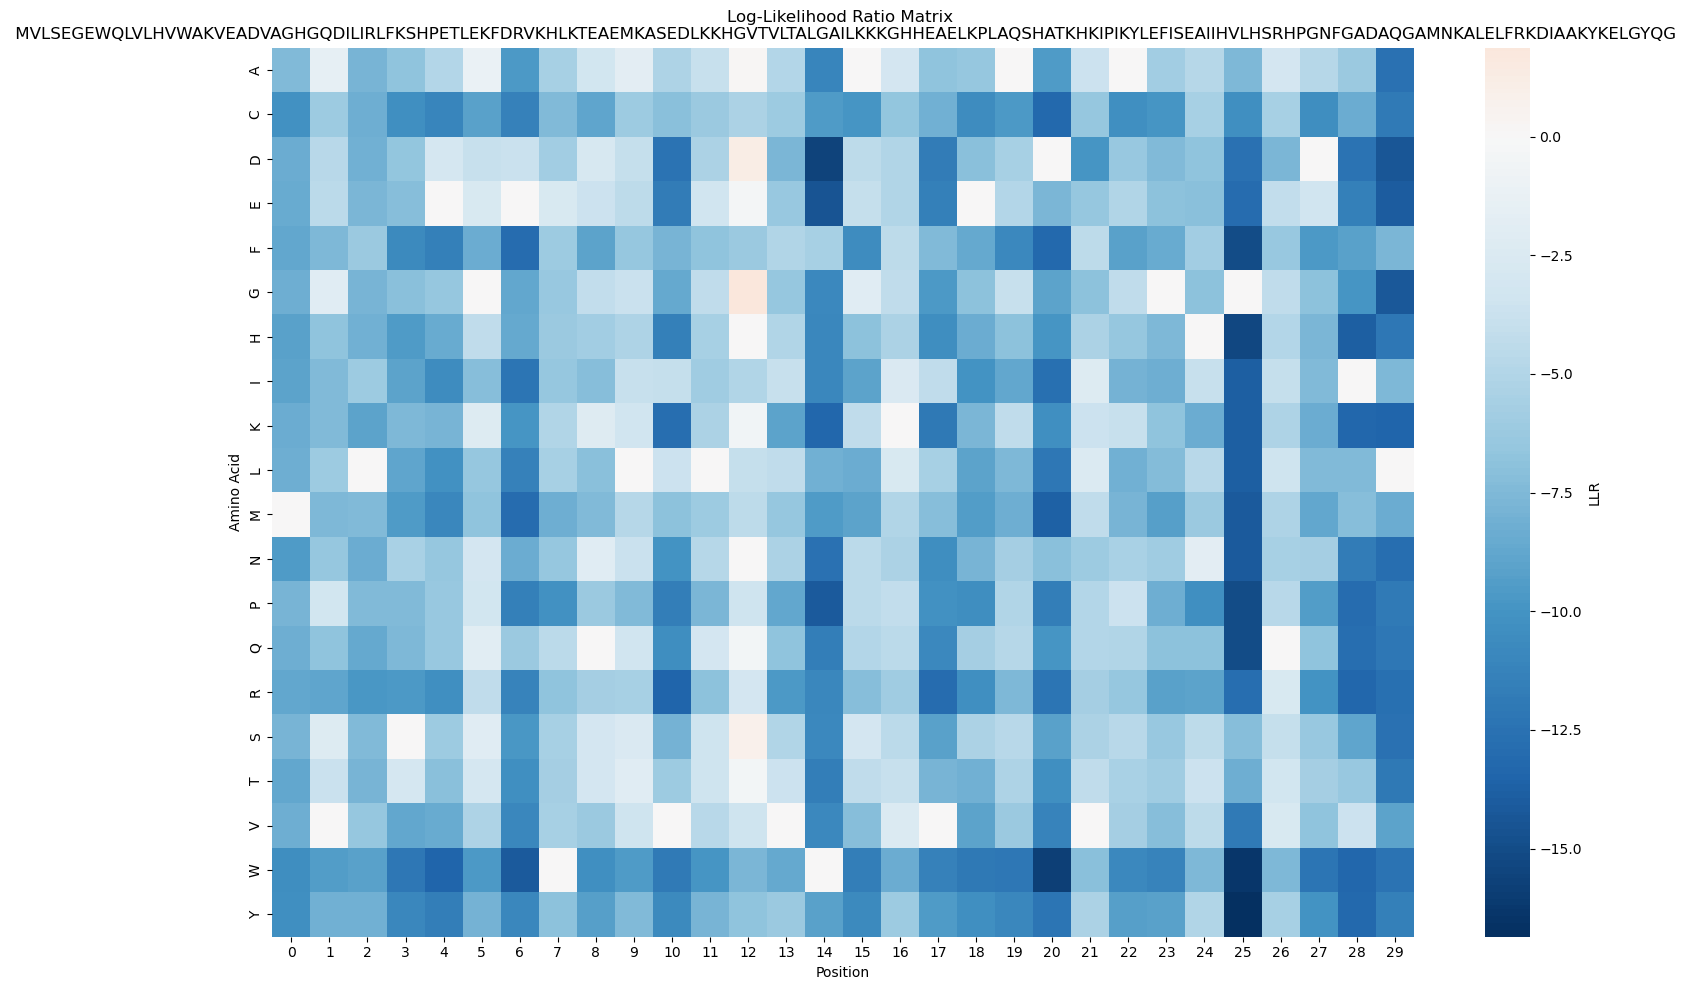

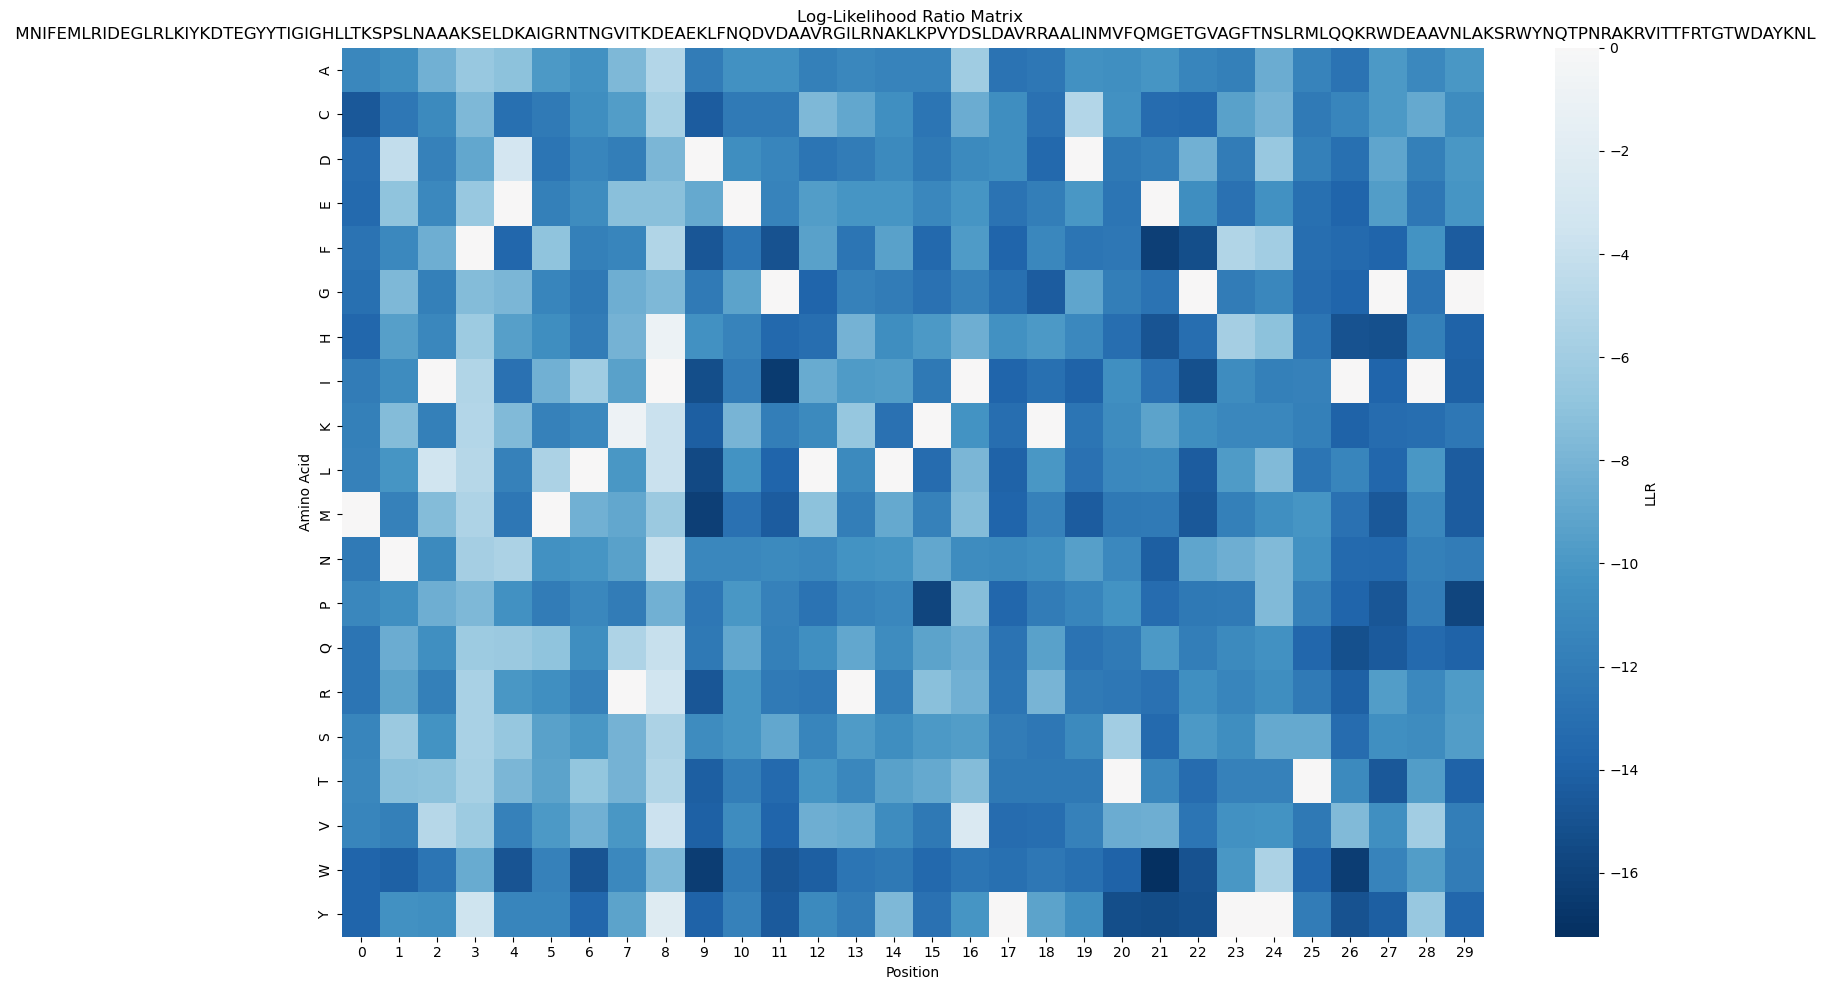

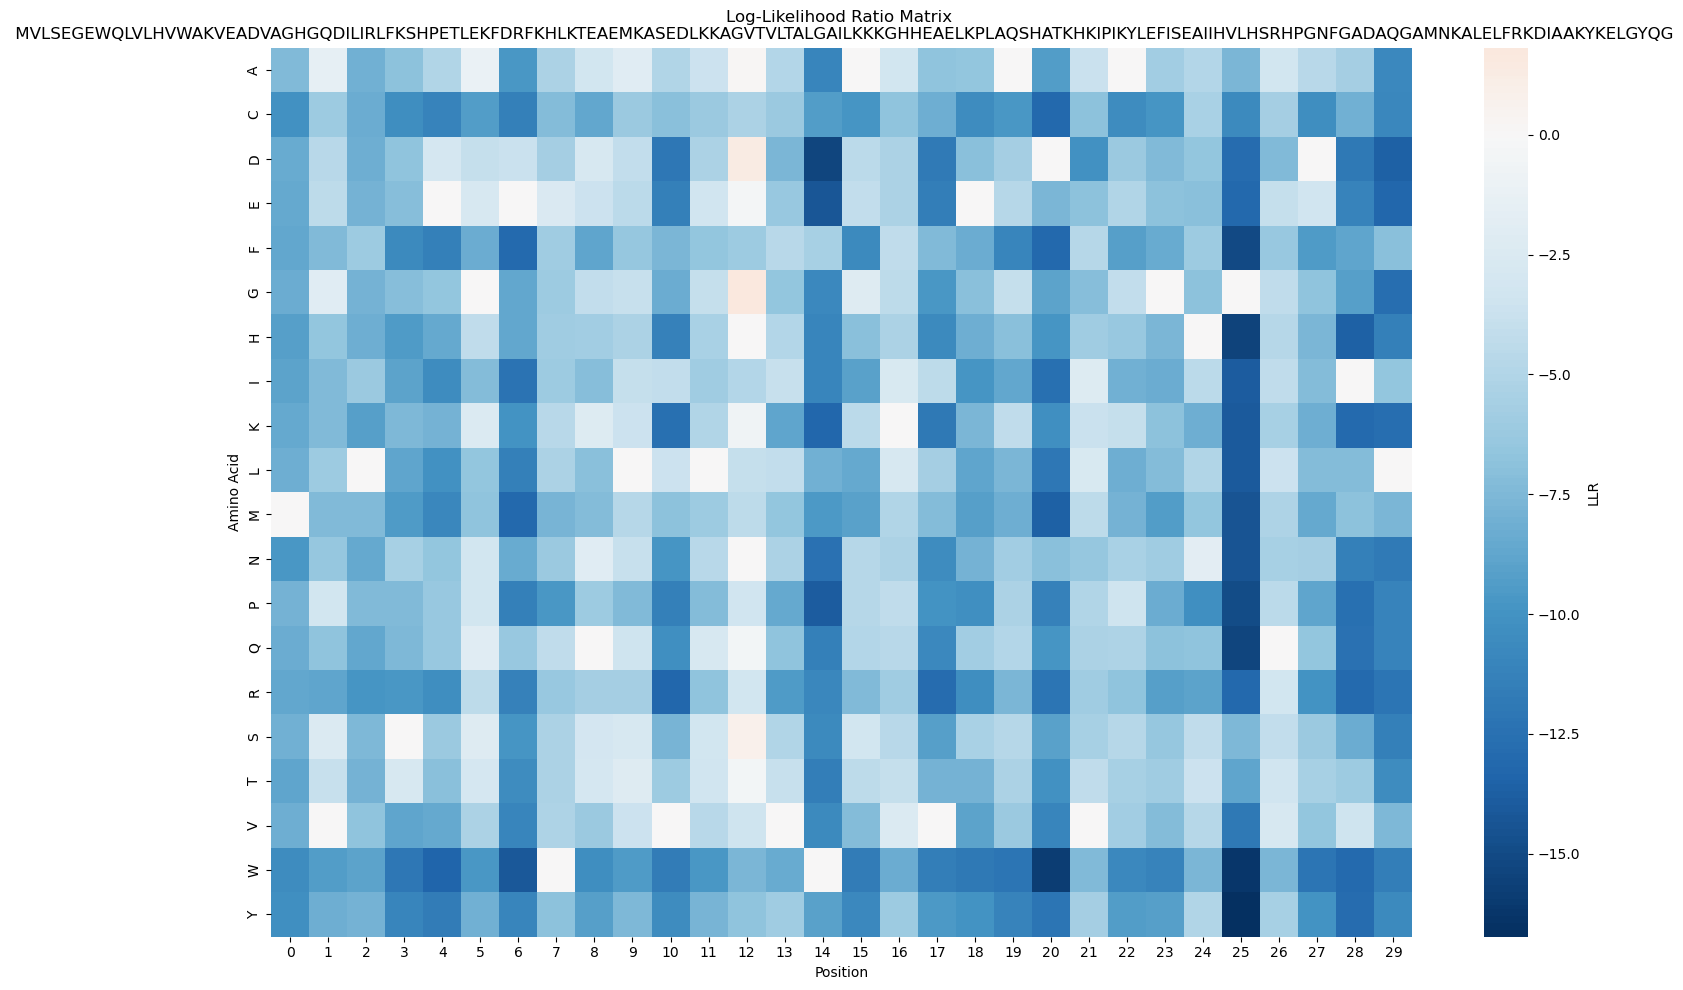

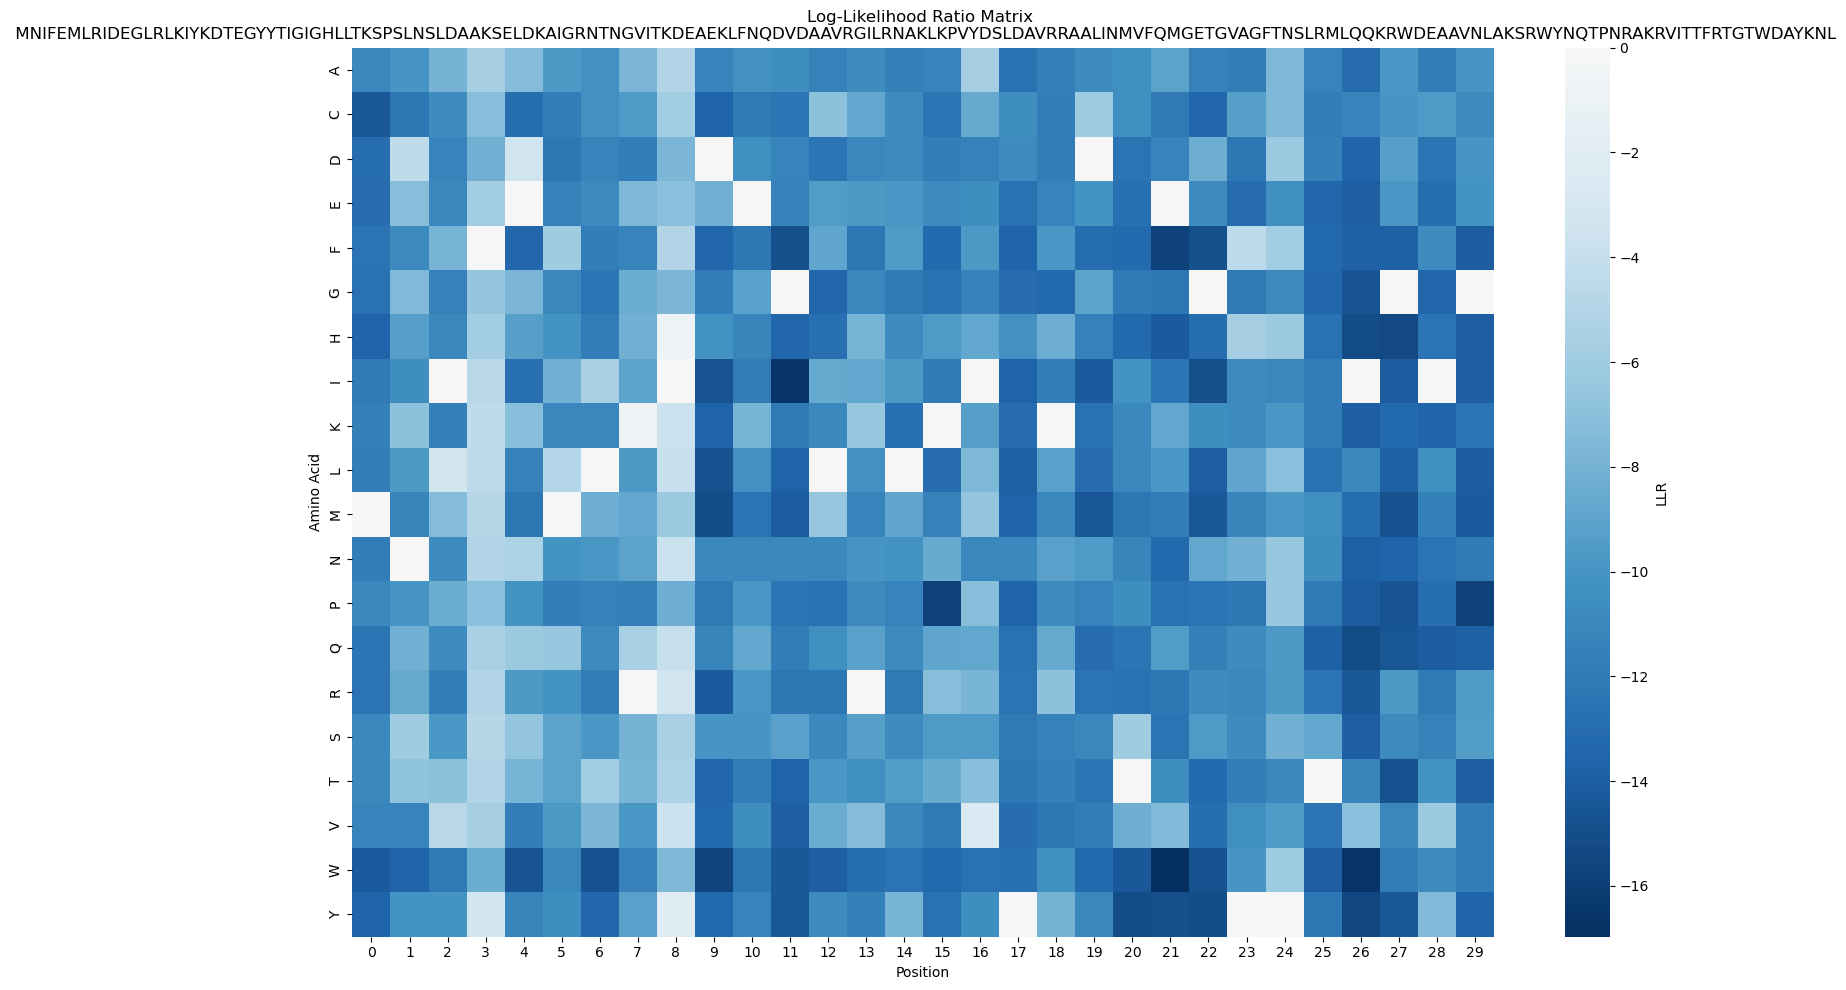

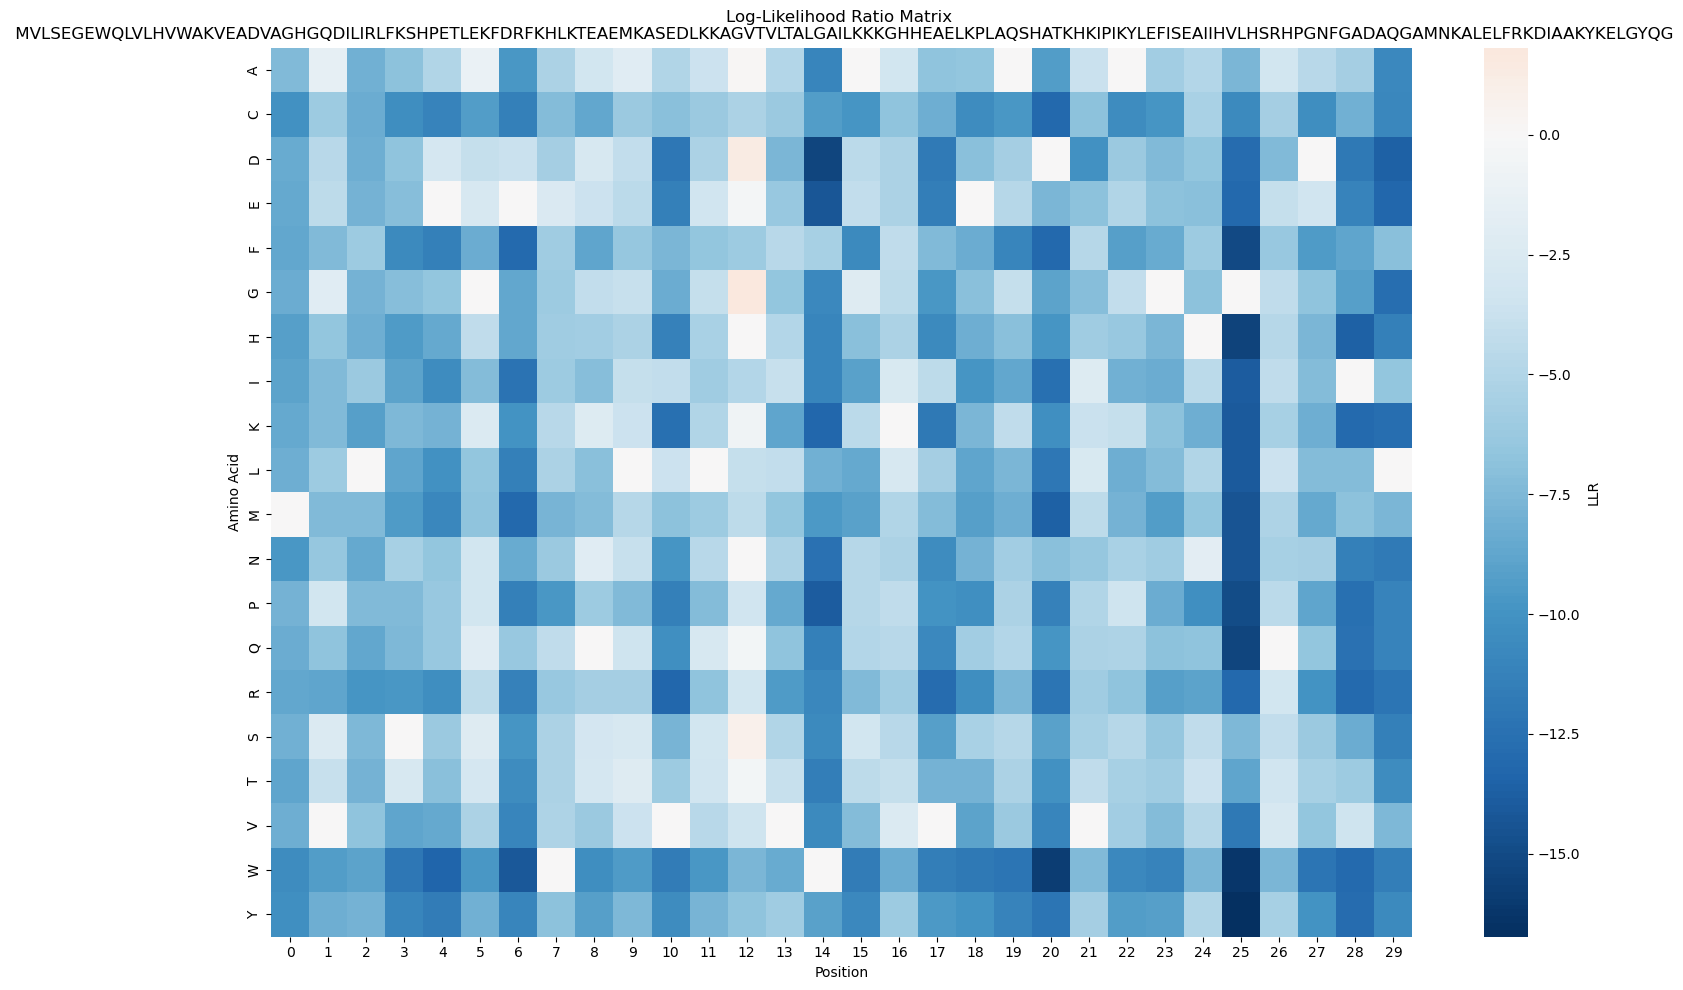

In [11]:
for i in range(0,5):

    llr = esm_pbd_long_matrix_dict[i]["llr_matrix"]
    seq = esm_pbd_long_matrix_dict[i]["sequence"]
    llr_heatmap(llr,positions=range(0,30),sequence=seq)